## Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libaries

In [ ]:
#hide earrings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

## Dataset

In [ ]:
headbrain_df = pd.read_csv('/content/drive/MyDrive/ML/DECISION TREE/HEAD_BRAIN_DATA_SET_DT_ML_MODEL/headbrain.csv')
print(headbrain_df.shape)
#headbrain_df.head()
headbrain_df.sample(10)

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
45,1,1,4034,1422
145,2,1,3899,1380
1,1,1,3738,1297
22,1,1,3804,1275
49,1,1,3644,1300
104,1,2,3618,1290
66,1,2,3415,1310
198,2,2,3493,1240
27,1,1,4022,1485
150,2,1,3413,1322


### Data Augmentation?
- Data Augmentation is refer to correct/revised copies of previously existing data or recently made synthetic data based on existing data.
- Training a machine learning or artificial intelligence model is a regularizer and helps reduce overfitting

In [ ]:
# Assuming you have the DataFrame with your data
data = {
    'Gender': [1, 1, 2, 1, 1, 1, 2, 2, 1, 1],
    'Age Range': [2, 1, 2, 2, 2, 2, 1, 2, 2, 2],
    'Head Size(cm^3)': [3478, 3095, 3246, 3558, 3495, 4008, 3439, 3165, 3695, 4442],
    'Brain Weight(grams)': [1270, 1340, 1180, 1225, 1218, 1468, 1192, 1237, 1310, 1330]
}

df = pd.DataFrame(data)

# Perform numerical data augmentation by adding random noise
augmented_data = []
num_augmentations = 30  # You can adjust the number of augmentations as needed

for _, row in df.iterrows(): # The underscore "_" is a common convention in Python to indicate that a variable is not going to be used in the loop body.
    for _ in range(num_augmentations):
        augmented_row = row.copy()
        augmented_row['Head Size(cm^3)'] += int(np.random.normal(scale=50))  # Adjust the scale as needed
        augmented_row['Brain Weight(grams)'] += int(np.random.normal(scale=10))  # Adjust the scale as needed
        augmented_data.append(augmented_row)

augmented_df = pd.DataFrame(augmented_data)

# Concatenate the original and augmented data
combined_df = pd.concat([df, augmented_df], ignore_index=True)
combined_df
new_version_hd_df = pd.concat([new_version_hd_df,combined_df],ignore_index=True)

In [ ]:
new_version_hd_df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
542,1,2,4502,1331
543,1,2,4376,1343
544,1,2,4334,1333
545,1,2,4431,1332


## Applying some necessary steps for given task

In [ ]:
new_version_hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               547 non-null    int64
 1   Age Range            547 non-null    int64
 2   Head Size(cm^3)      547 non-null    int64
 3   Brain Weight(grams)  547 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB


In [ ]:
new_version_hd_df['Age Range'].unique()

array([1, 2])

In [ ]:
new_version_hd_df.drop(['Age Range'], axis=1, inplace=True)

In [ ]:
new_version_hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               547 non-null    int64
 1   Head Size(cm^3)      547 non-null    int64
 2   Brain Weight(grams)  547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [ ]:
new_version_hd_df.Gender.unique()

array([1, 2])

In [ ]:
# Assuming you have the DataFrame new_version_hd_df
filtered_df_f = new_version_hd_df[new_version_hd_df.Gender == 1]
filtered_df_f.sample(2)

,Gender,Head Size(cm^3),Brain Weight(grams)
383,1,3508,1225
83,1,3577,1245


In [ ]:
# Assuming you have the DataFrame new_version_hd_df
filtered_df_m = new_version_hd_df[new_version_hd_df.Gender == 2]
filtered_df_m.sample(2)

,Gender,Head Size(cm^3),Brain Weight(grams)
185,2,3642,1205
198,2,3493,1240


In [ ]:
print("The average size of head of female is: ",new_version_hd_df["Head Size(cm^3)"].mean())
print("The average Brain Weight(grams) of female is: ",new_version_hd_df["Brain Weight(grams)"].mean())

The average size of head of female is:  3592.5740402193783
The average Brain Weight(grams) of female is:  1279.8537477148082


In [ ]:
print("The average size of head of male is: ",new_version_hd_df["Head Size(cm^3)"].mean())
print("The average Brain Weight(grams) of male is: ",new_version_hd_df["Brain Weight(grams)"].mean())

The average size of head of male is:  3592.5740402193783
The average Brain Weight(grams) of male is:  1279.8537477148082


## Viz

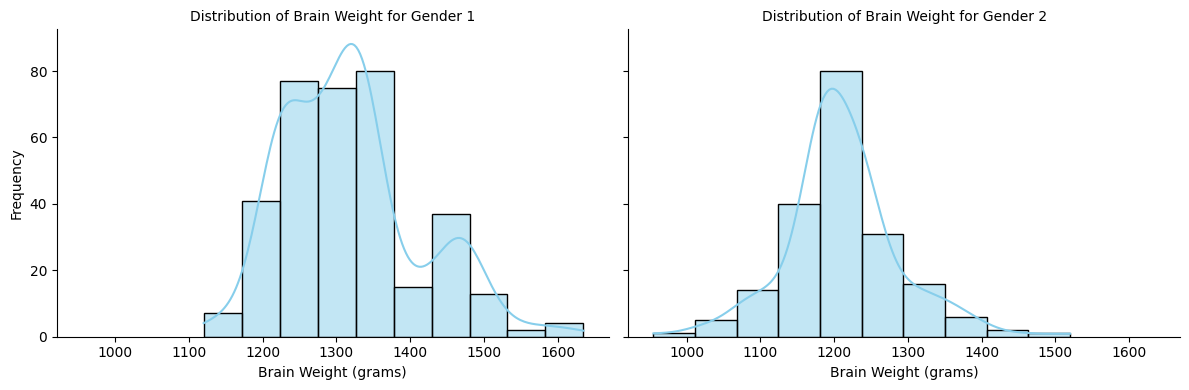

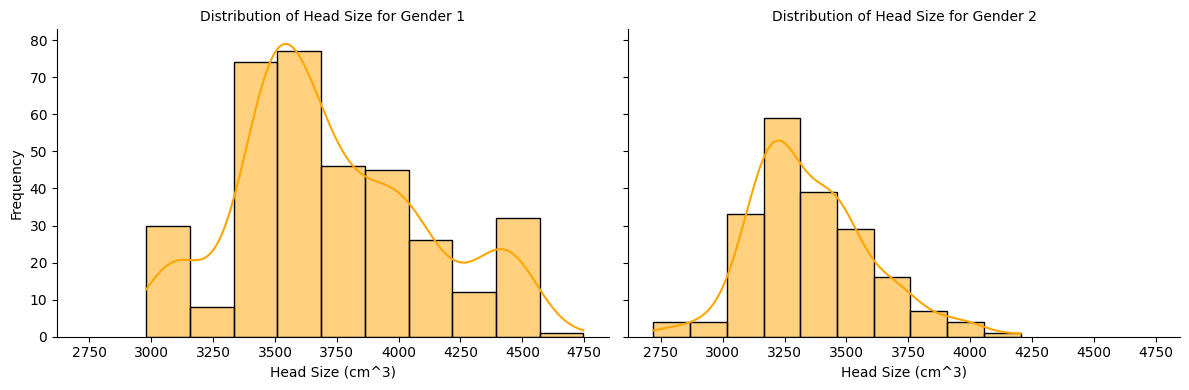

In [ ]:
# Assuming you have the DataFrame new_version_hd_df
filtered_df = new_version_hd_df[new_version_hd_df.Gender.isin([1, 2])]

# Create a FacetGrid for the histograms
g = sns.FacetGrid(filtered_df, col="Gender", height=4, aspect=1.5)
g.map_dataframe(sns.histplot, x='Brain Weight(grams)', bins=10, kde=True, color='skyblue')
g.set_axis_labels('Brain Weight (grams)', 'Frequency')
g.set_titles('Distribution of Brain Weight for Gender {col_name}')
g.tight_layout()
plt.show()

# Create another FacetGrid for the histograms of Head Size
g = sns.FacetGrid(filtered_df, col="Gender", height=4, aspect=1.5)
g.map_dataframe(sns.histplot, x='Head Size(cm^3)', bins=10, kde=True, color='orange')
g.set_axis_labels('Head Size (cm^3)', 'Frequency')
g.set_titles('Distribution of Head Size for Gender {col_name}')
g.tight_layout()
plt.show()


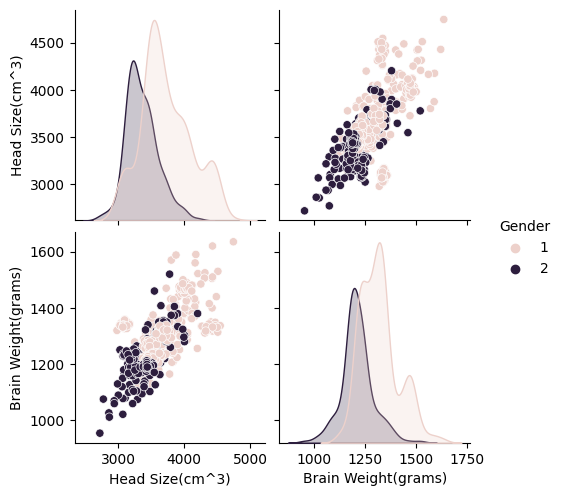

In [ ]:
sns.pairplot(data= new_version_hd_df,hue='Gender')
plt.show()

<Axes: >

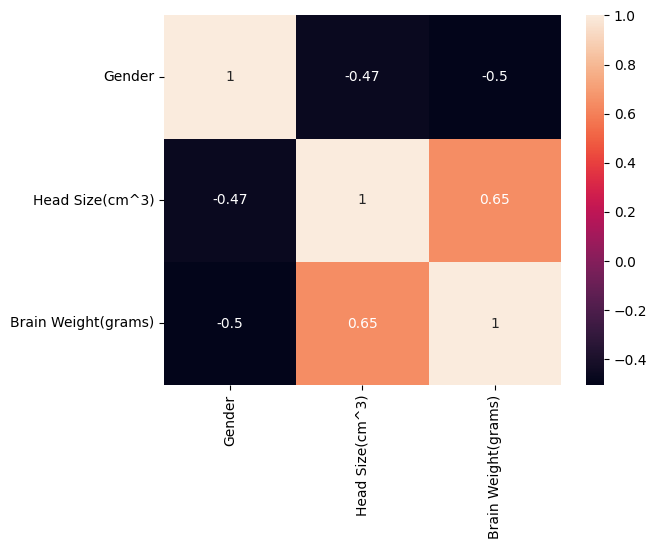

In [ ]:
sns.heatmap(new_version_hd_df.corr(),annot=True)

## seprate column for ML MOdel

In [ ]:
y = new_version_hd_df['Gender']
X = new_version_hd_df.drop('Gender',axis=1)

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [ ]:
X.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


## Normalization

In [ ]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X

array([[0.88406512, 0.84558824],
       [0.50222003, 0.50294118],
       [0.7602368 , 0.55882353],
       ...,
       [0.79625062, 0.55588235],
       [0.84410459, 0.55441176],
       [0.79279724, 0.53382353]])

## train and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
#random_state it take same size of simple at every time

## model training

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluation

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.88      0.88       114
           2       0.74      0.76      0.75        51

    accuracy                           0.84       165
   macro avg       0.81      0.82      0.82       165
weighted avg       0.84      0.84      0.84       165



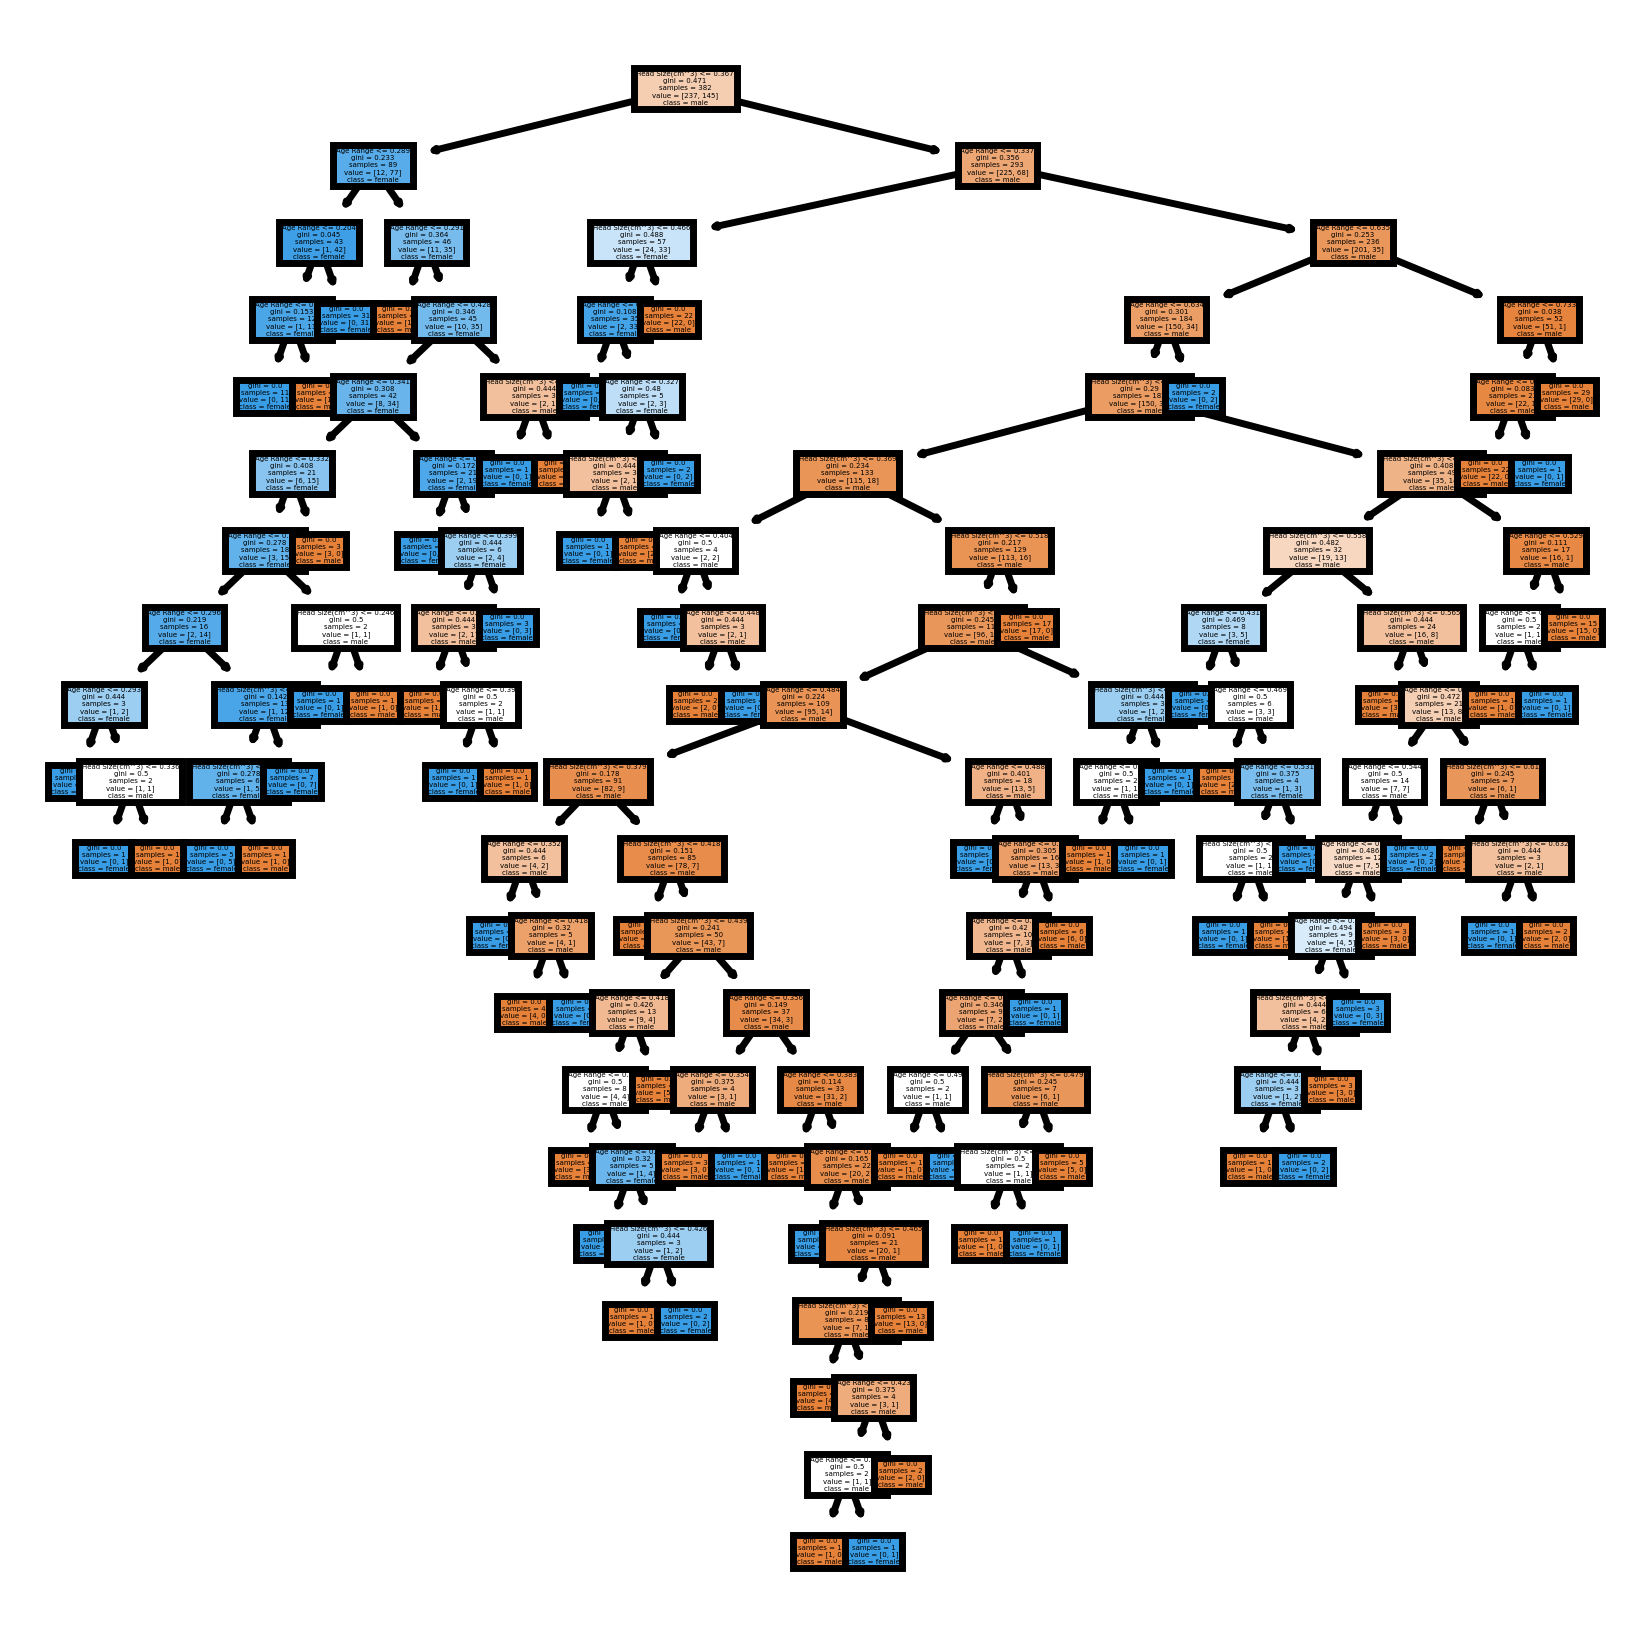

In [ ]:
fn = ["Age Range", "Head Size(cm^3)","Brain Weight(grams)"]
cn = ['male','female']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(dt,
              feature_names = fn,
              class_names = cn,
              filled = True);
fig.savefig('imagename.png')

## pickle

In [ ]:
#pickle.dump(dt,open('model.pkl','wb'))
# saving the model
import pickle
pickle_out = open("model12.pkl", mode = "wb")
pickle.dump(dt, pickle_out)
pickle_out.close()